In [1]:
!pip install ethnicolr

  Using cached ethnicolr-0.8.1-py2.py3-none-any.whl (36.1 MB)
  Using cached tensorflow-2.5.2-cp38-cp38-win_amd64.whl (422.7 MB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached importlib_metadata-4.8.2-py3-none-any.whl (17 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [31]:
import json
import pandas as pd
from ethnicolr import census_ln, pred_census_ln
import numpy as np
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDRegressor

In [3]:
from ethnicolr import pred_fl_reg_ln, pred_fl_reg_name, pred_fl_reg_ln_five_cat, pred_fl_reg_name_five_cat

In [41]:
data=pd.read_csv('data_race_pred.csv',encoding='utf-8')
data_for_race_name = pd.read_csv('data_for_race_name.csv',encoding = 'latin1')

In [42]:
data.head()

,Unnamed: 0,id,tweets,name,screen_name,description,img_path,is_female,year_born,race
0,0,12488,"['YKAR, a futuristic sans serif font by @Emmer...",Chad Boyce,djsnipa1,"Multimedia Developer, Graphic Designer, DJ, an...",profile pics/60147.jpeg,0.0,1980.0,4.0
1,1,719703,"['In other words, it’s good news about the vac...",Tomato 😷,Tomato,🇭🇰Rise Up!,profile pics/60148.jpeg,0.0,1985.0,4.0
2,2,749003,['would it be fair to call lil nas x the first...,A ring made from a spoon --- E83.31,IYQbd,Has the kind of luck that turns a professional...,profile pics/60150.jpeg,0.0,1982.0,5.0
3,3,822540,"['@Asmongold ❤️ 🙏', '@Hunter4J @Wario64 bonk',...",parker,parker,gotta go fast,profile pics/60153.jpeg,0.0,1979.0,4.0
4,4,865071,['@robo_james How about pizza dipped in water ...,Kevin Jones,kevinj,NaN,profile pics/60154.jpeg,0.0,1995.0,4.0


In [43]:
data_for_race_name.head()

,user_id,fn,ln,screen_name,race,ln1,full_name
0,12488,Chad,Boyce,djsnipa1,4,Boyce,Chad Boyce
1,822540,parker,NaN,parker,4,parker,parker parker
2,865071,Kevin,Jones,kevinj,4,Jones,Kevin Jones
3,988211,Joe,Duhamel,jduhamel,4,Duhamel,Joe Duhamel
4,1025311,Carrie,Jackson,carebear,4,Jackson,Carrie Jackson


In [45]:
df = pd.DataFrame(data)
#odf = pred_fl_reg_name(df, 'name')
#odf = pred_fl_reg_ln(df, 'name')

In [63]:
df_name = pd.DataFrame(data_for_race_name)
odf_name = pred_fl_reg_name(df_name, 'ln1', 'fn')

['asian', 'hispanic', 'nh_black', 'nh_white']


In [49]:
odf_name

,user_id,fn,ln,screen_name,race_x,ln1,full_name,__name,rowindex,asian_mean,...,hispanic_ub,nh_black_mean,nh_black_std,nh_black_lb,nh_black_ub,nh_white_mean,nh_white_std,nh_white_lb,nh_white_ub,race_y
0,12488,Chad,Boyce,djsnipa1,4,Boyce,Chad Boyce,Boyce Chad,0,0.005127,...,0.002321,0.122594,0.054618,0.040756,0.046307,0.862707,0.059222,0.636156,0.670669,nh_white
1,822540,parker,NaN,parker,4,parker,parker parker,Parker Parker,1,0.548525,...,0.011610,0.055902,0.046317,0.006484,0.007841,0.267394,0.144689,0.040245,0.045365,asian
2,865071,Kevin,Jones,kevinj,4,Jones,Kevin Jones,Jones Kevin,2,0.069432,...,0.067141,0.189380,0.084933,0.049359,0.061402,0.410355,0.149854,0.126408,0.167937,nh_white
3,988211,Joe,Duhamel,jduhamel,4,Duhamel,Joe Duhamel,Duhamel Joe,3,0.110163,...,0.037840,0.069218,0.064496,0.006326,0.007848,0.524325,0.186905,0.129035,0.181556,nh_white
4,1025311,Carrie,Jackson,carebear,4,Jackson,Carrie Jackson,Jackson Carrie,4,0.002667,...,0.003010,0.352035,0.134412,0.061568,0.089768,0.636572,0.133700,0.297595,0.350881,nh_white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,3196361888,Shortie,NaN,x3_adrii,1,Shortie,Shortie Shortie,Shortie Shortie,2548,0.009531,...,0.003467,0.583619,0.168950,0.132577,0.183240,0.398002,0.167574,0.053985,0.086640,nh_black
2549,3323699762,Ben,NaN,sp4srhxkan,4,Ben,Ben Ben,Ben Ben,2549,0.986288,...,0.000113,0.001317,0.001481,0.000196,0.000196,0.011780,0.012389,0.001821,0.002043,asian
2550,3352812676,Meagan,Lovely,meaganislovely,4,Lovely,Meagan Lovely,Lovely Meagan,2550,0.033825,...,0.013498,0.318899,0.151403,0.061098,0.066698,0.602811,0.147331,0.221443,0.270109,nh_white
2551,3924536853,Megan,Schuitema,meganschuitema,4,Schuitema,Megan Schuitema,Schuitema Megan,2551,0.043229,...,0.048242,0.251637,0.119579,0.079111,0.080187,0.567722,0.130493,0.276475,0.304835,nh_white


In [51]:
odf_name['race_y'] = odf_name['race_y'].map({"nh_white" : 4, "nh_black" : 1,"hispanic" : 2,"asian" : 3})

In [52]:
odf_name.head()

,user_id,fn,ln,screen_name,race_x,ln1,full_name,__name,rowindex,asian_mean,...,hispanic_ub,nh_black_mean,nh_black_std,nh_black_lb,nh_black_ub,nh_white_mean,nh_white_std,nh_white_lb,nh_white_ub,race_y
0,12488,Chad,Boyce,djsnipa1,4,Boyce,Chad Boyce,Boyce Chad,0,0.005127,...,0.002321,0.122594,0.054618,0.040756,0.046307,0.862707,0.059222,0.636156,0.670669,4
1,822540,parker,NaN,parker,4,parker,parker parker,Parker Parker,1,0.548525,...,0.011610,0.055902,0.046317,0.006484,0.007841,0.267394,0.144689,0.040245,0.045365,3
2,865071,Kevin,Jones,kevinj,4,Jones,Kevin Jones,Jones Kevin,2,0.069432,...,0.067141,0.189380,0.084933,0.049359,0.061402,0.410355,0.149854,0.126408,0.167937,4
3,988211,Joe,Duhamel,jduhamel,4,Duhamel,Joe Duhamel,Duhamel Joe,3,0.110163,...,0.037840,0.069218,0.064496,0.006326,0.007848,0.524325,0.186905,0.129035,0.181556,4
4,1025311,Carrie,Jackson,carebear,4,Jackson,Carrie Jackson,Jackson Carrie,4,0.002667,...,0.003010,0.352035,0.134412,0.061568,0.089768,0.636572,0.133700,0.297595,0.350881,4


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(odf_name["race_x"], odf_name["race_y"])

0.6948687818253035

              precision    recall  f1-score   support

           1       0.14      0.16      0.15       219
           2       0.13      0.13      0.13       126
           3       0.06      0.14      0.09        77
           4       0.85      0.80      0.83      2131

    accuracy                           0.69      2553
   macro avg       0.30      0.31      0.30      2553
weighted avg       0.73      0.69      0.71      2553

RMSE on testing set =  1.6231884057971016


<AxesSubplot:>

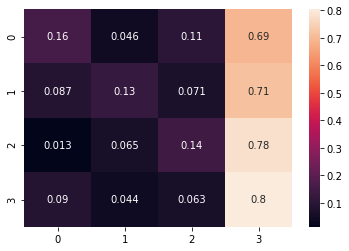

In [54]:
print(classification_report(odf_name["race_x"],  odf_name["race_y"]))
print("RMSE on testing set = ", mean_squared_error(odf_name["race_x"], odf_name["race_y"]))

cm = confusion_matrix(odf_name["race_x"], odf_name["race_y"], normalize='true')
sns.heatmap(cm, annot=True)

In [55]:
df_name = pd.DataFrame(data_for_race_name)
census = pred_census_ln(df_name, 'full_name')


['api', 'black', 'hispanic', 'white']


In [60]:
census['race_y'] = census['race_y'].map({"white" : 4, "black" : 1,"hispanic" : 2,"api" : 3})

In [61]:
accuracy_score(census["race_x"], census["race_y"])

0.8135526831179005

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       219
           2       0.22      0.13      0.16       126
           3       0.19      0.14      0.16        77
           4       0.85      0.96      0.90      2131

    accuracy                           0.81      2553
   macro avg       0.31      0.31      0.31      2553
weighted avg       0.72      0.81      0.76      2553

RMSE on testing set =  1.0176263219741482


<AxesSubplot:>

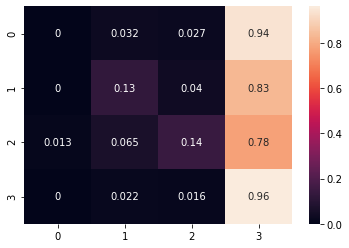

In [62]:
print(classification_report(census["race_x"],  census["race_y"]))
print("RMSE on testing set = ", mean_squared_error(census["race_x"], census["race_y"]))

cm = confusion_matrix(census["race_x"], census["race_y"], normalize='true')
sns.heatmap(cm, annot=True)